## Linear Regression

* Linear regression is a statistical machine learning method you can use to quantify, and make predictions based on, relationships between numerical variables.

* Simple linear regression - One predictor and one predictant

* Multiple linear regression - Multiple predictors and one predictant

## Use Cases
* Sales forecasting
* Resource consumption forecasting
* Supply cost forecasting
* Telecom services lifecycle forecasting

### Linear Regression Assumption
* All variables are continuous numeric, not categorical.
* Data is free of missingvalues and outliers.
* There's a linear relationship between predictors and predictant.
* All predictors are independent of each other.
* Residuals (aka prediction errors) are normally distributed.



In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from collections import Counter

In [4]:
%matplotlib inline
plt.style.use("seaborn-whitegrid")
rcParams["figure.figsize"]=7,4

### (Multiple) linear regression on the enrollment data

In [11]:
address = ("/users/leo/downloads/enrollment_forecast.csv")
enroll = pd.read_csv(address)
enroll.columns

Index(['year', 'roll', 'unem', 'hgrad', 'inc'], dtype='object')

In [12]:
enroll.head()

,year,roll,unem,hgrad,inc
0,1,5501,8.1,9552,1923
1,2,5945,7.0,9680,1961
2,3,6629,7.3,9731,1979
3,4,7556,7.5,11666,2030
4,5,8716,7.0,14675,2112


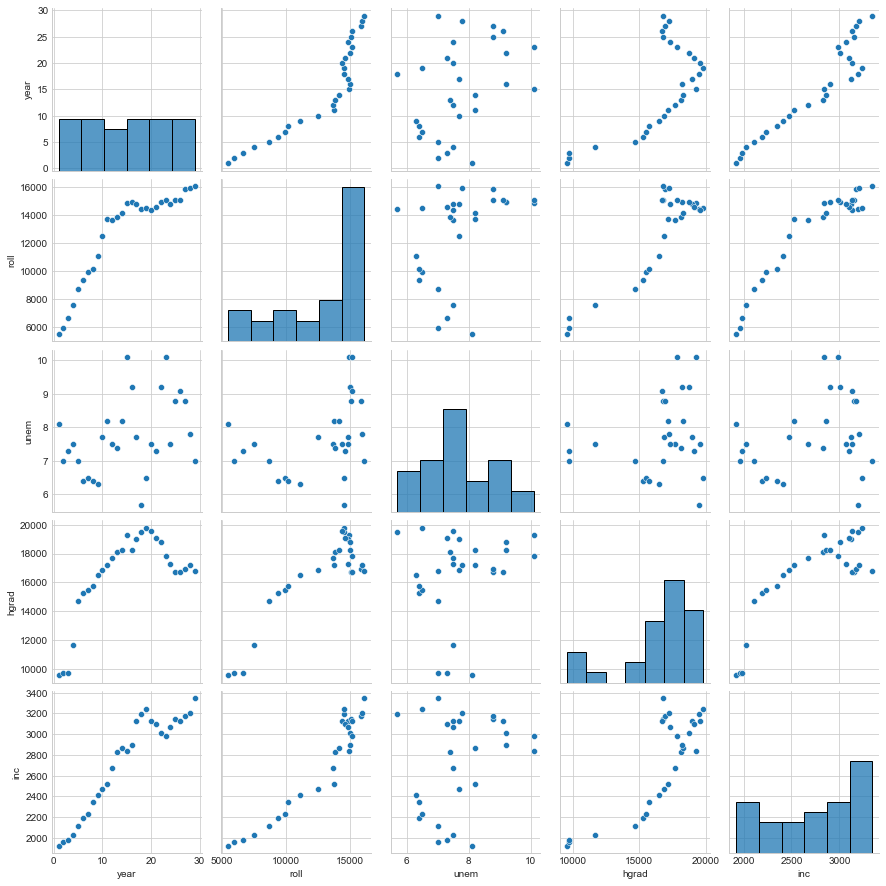

In [13]:
sb.pairplot(enroll)

In [14]:
print(enroll.corr())

           year      roll      unem     hgrad       inc
year   1.000000  0.900934  0.378305  0.670300  0.944287
roll   0.900934  1.000000  0.391344  0.890294  0.949876
unem   0.378305  0.391344  1.000000  0.177376  0.282310
hgrad  0.670300  0.890294  0.177376  1.000000  0.820089
inc    0.944287  0.949876  0.282310  0.820089  1.000000


In [17]:
enroll_data = enroll.loc[:,("unem","hgrad")].values
enroll_target = enroll.iloc[:,1].values
enroll_data_names = ["unem", "hgrad"]

x = scale(enroll_data)
y = enroll_target

### Checking for missing values

In [19]:
missing_values = x ==np.NAN
x[missing_values] == True

array([], dtype=bool)

In [23]:
import warnings
warnings.filterwarnings("ignore")

In [24]:
LinReg = LinearRegression(normalize=True)
LinReg.fit(x,y)

print(LinReg.score(x,y))

0.8488812666133723
